<a href="https://colab.research.google.com/github/RebekkalPangras/Loan-Prediction/blob/master/Loan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Anaysis

### 1. Reading the data into a pandas dataframe

In [0]:
import pandas as pd
df = pd.read_csv('/content/loan-data-v1.csv')

## 2. Simple EDA

### Display first 5 observations

In [22]:
df.head(5)

,Name,State,Age,Annual Income,Loan Type,Loan Amount,Length of Days,Days Delinquent,Interest Rt,Number of Years,Years as customer
0,Keslie Coll,CO,49,115117,Business,161904,15,117,2.290,2,5
1,Caesar Shr.,KY,29,181862,Business,74752,10,2,2.350,1,5
2,Melissa H,FL,43,116011,Home,228342,15,0,4.445,2,6
3,Marcia B,MT,43,115197,Personal,48059,5,0,4.500,2,4
4,Yvonne R,MA,77,108991,Home,239937,10,0,4.395,0,2


### Show data type of each column

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                21 non-null     object 
 1   State               21 non-null     object 
 2   Age                 21 non-null     int64  
 3   Annual Income       21 non-null     int64  
 4    Loan Type          21 non-null     object 
 5    Loan Amount        21 non-null     int64  
 6    Length of Days     21 non-null     int64  
 7    Days Delinquent    21 non-null     int64  
 8    Interest Rt        21 non-null     float64
 9    Number of Years    21 non-null     int64  
 10   Years as customer  21 non-null     int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.9+ KB


### Summary of the data

In [24]:
df.describe()

,Age,Annual Income,Loan Amount,Length of Days,Days Delinquent,Interest Rt,Number of Years,Years as customer
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,55.476190,98782.428571,258956.571429,17.857143,79.761905,3.525714,1.380952,6.095238
std,18.151085,53856.209637,216543.460554,9.296697,75.195016,1.069923,1.023533,3.389760
min,24.000000,20773.000000,48059.000000,5.000000,0.000000,2.290000,0.000000,1.000000
25%,43.000000,56167.000000,112970.000000,10.000000,0.000000,2.350000,1.000000,4.000000
50%,50.000000,103598.000000,191666.000000,15.000000,94.000000,4.375000,1.000000,6.000000
75%,70.000000,116011.000000,291526.000000,30.000000,144.000000,4.445000,2.000000,8.000000
max,80.000000,198541.000000,776736.000000,30.000000,232.000000,4.500000,3.000000,15.000000


### correlation analysis of the data

In [25]:
df.corr()

,Age,Annual Income,Loan Amount,Length of Days,Days Delinquent,Interest Rt,Number of Years,Years as customer
Age,1.000000,-0.034297,0.201133,-0.121062,0.278172,-0.010729,0.148535,-0.299013
Annual Income,-0.034297,1.000000,0.204414,0.020005,-0.388662,-0.496906,0.232063,-0.534160
Loan Amount,0.201133,0.204414,1.000000,0.173800,0.200326,-0.255197,0.239046,-0.354015
Length of Days,-0.121062,0.020005,0.173800,1.000000,0.026055,-0.216618,-0.251470,0.133729
Days Delinquent,0.278172,-0.388662,0.200326,0.026055,1.000000,-0.036749,-0.184562,0.289627
Interest Rt,-0.010729,-0.496906,-0.255197,-0.216618,-0.036749,1.000000,-0.152986,0.238690
Number of Years,0.148535,0.232063,0.239046,-0.251470,-0.184562,-0.152986,1.000000,-0.558604
Years as customer,-0.299013,-0.534160,-0.354015,0.133729,0.289627,0.238690,-0.558604,1.000000


### printing the unique values of column 'loan type'

In [26]:
df[' Loan Type'].unique()

array(['Business', 'Home', 'Personal'], dtype=object)

## 3. Data Visualisation

### Histogram for Age

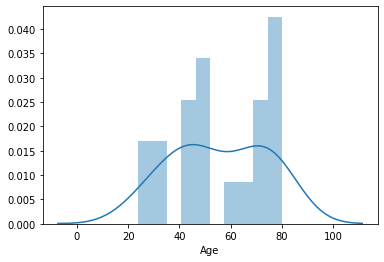

In [27]:
import seaborn as sns
sns.distplot(df['Age'], bins = 10)

### Barplot for Loan Amount

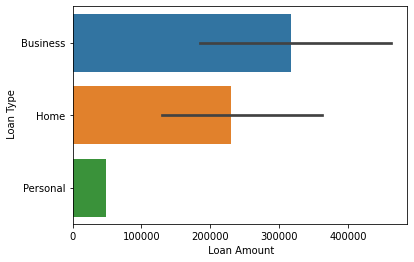

In [28]:
sns.barplot(x=df[' Loan Amount'], y=df[' Loan Type'])

### Box plot for Annual Income by Loan Type

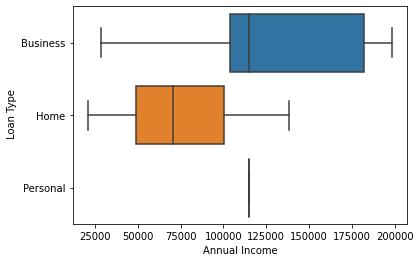

In [32]:
sns.boxplot(df['Annual Income'],df[' Loan Type'])

### scatterplot for annaul income and loan amount

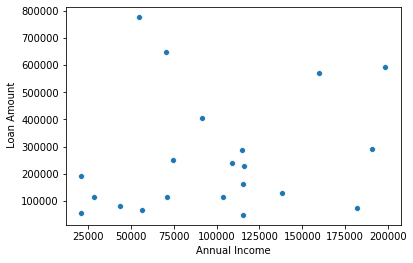

In [33]:
sns.scatterplot(df['Annual Income'],df[' Loan Amount'])

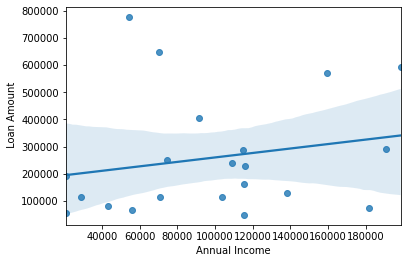

In [34]:
sns.regplot(df['Annual Income'],df[' Loan Amount'])

## Statistical Regression Analysis

### 1. Cleaning and Preprocessing data

### create column Flag based on value of Days delinquent

In [0]:
def label_flag (row):
   if row[' Days Delinquent'] > 90 :
      return 1
   else:
      return 0

df['Flag'] = df.apply (lambda row: label_flag(row), axis=1)

### create log_annual_income and log_loan_amount

In [0]:
import numpy as np
df['log_annual_income'] = np.log(df['Annual Income'])
df['log_loan_amount'] = np.log(df[' Loan Amount'])

### create dummy vaiables for each value of 'Loan Type'

In [0]:
df = pd.get_dummies(df, prefix = 'LoanType', columns = [' Loan Type'])

### 2. Building logit regression model

In [0]:
columns = ['Age','log_annual_income','log_loan_amount','LoanType_Business','LoanType_Home','LoanType_Personal']
X = df[columns]
y = df['Flag']

In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()

         Current function value: 0.521612
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 3. Printing summary of the model

In [53]:
print(result.summary2())

                              Results: Logit
Model:                  Logit                Pseudo R-squared:     0.246  
Dependent Variable:     Flag                 AIC:                  33.9077
Date:                   2020-04-29 04:16     BIC:                  40.1748
No. Observations:       21                   Log-Likelihood:       -10.954
Df Model:               5                    LL-Null:              -14.532
Df Residuals:           15                   LLR p-value:          0.20923
Converged:              0.0000               Scale:                1.0000 
No. Iterations:         35.0000                                           
--------------------------------------------------------------------------
                   Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------
Age                0.0044     0.0302  0.1464 0.8836     -0.0547     0.0636
log_annual_income -2.3376     1.2844 -1.8200 0.0688    

### The Pseudo R- Squared value indicated that the model does not fit very well. this can be overcome by increasing the size of the dataset. Value of 1 in Psuedo R-Squared indicated a best fit and 0 indicated worst fit.

## Predictive Analysis with Machine Learning

### 1. Cluster analysis on log_annual_income and log_loan_amount

In [0]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2, random_state = 1)
cluster_labels = kmeans_model.fit_predict(df[['log_annual_income', 'log_loan_amount']])
df['cluster'] = cluster_labels

### scatterplot

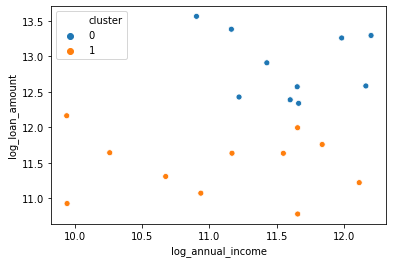

In [57]:
sns.scatterplot(df['log_annual_income'],df['log_loan_amount'],hue = df['cluster'])

### 2. Logistic Regression Classifier

### splitting training and testing dataset

In [0]:
from sklearn.model_selection import train_test_split

columns = ['Age','log_annual_income','log_loan_amount','LoanType_Business','LoanType_Home','LoanType_Personal']
X = df[columns]
y = df['Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

### train the model

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

### test the model

In [0]:
prediction = clf.predict(X_test)

### performance metrics

In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('F1 score: %f' % f1)
print('Confusion Matrix\n',confusion_matrix(y_test, prediction))

Accuracy: 0.714286
Precision: 1.000000
Recall: 0.600000
F1 score: 0.750000
Confusion Matrix
 [[2 0]
 [2 3]]
